Steps in feature selection:
1. Univariate Selection.
    - The scikit-learn library provides the SelectKBest - takes as input the definition of score function and number of top features (k) 
    - score function used $chi^2$ statistical test for non-negative features
2. Recursive Feature Elimination.
    - It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.
3. Principle Component Analysis.
4. Feature Importance.
    - ExtraTreesClassifier

Benefits:
- Reduces Overfitting : less noise 
- Improves Accuracy   : less misleading data
- Redces Traning Time : less data means that algorithms trains faster

In [1]:
import pandas as pd
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(r"./Datasets/pima-indians-diabetes.data.csv",names=names)
X , y = df.drop('class',axis=1) , df['class']

In [2]:
from sklearn.feature_selection import chi2,SelectKBest

In [3]:
test = SelectKBest(chi2,k=4) # we are taking top 4 features

fit = test.fit(X,y)

print("Score\n",fit.scores_)

test.fit_transform(X,y) 
# it returns the array 
# ARE the features
# plas, test, mass and age. 

Score
 [ 111.51969064 1411.88704064   17.60537322   53.10803984 2175.56527292
  127.66934333    5.39268155  181.30368904]


array([[148. ,   0. ,  33.6,  50. ],
       [ 85. ,   0. ,  26.6,  31. ],
       [183. ,   0. ,  23.3,  32. ],
       ...,
       [121. , 112. ,  26.2,  30. ],
       [126. ,   0. ,  30.1,  47. ],
       [ 93. ,   0. ,  30.4,  23. ]])

In [4]:
# Recursive Feature Elimination (RFE)

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [6]:
model = LogisticRegression()
rfe =  RFE(model,n_features_to_select=3)

In [7]:
fit = rfe.fit(X,y)

C:\Users\91882\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
print("Num Features: {}".format(fit.n_features_))
print("Selected Features: {}".format(fit.support_))
print("Feature Ranking: {}".format(fit.ranking_))

Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 4 5 6 1 1 3]


In [9]:
print("Features :",X.columns[fit.support_])

Features : Index(['preg', 'mass', 'pedi'], dtype='object')


In [10]:
## Principal Component Analysis (PCA)
# Data reduction - decomposition

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=3).fit(X)

In [13]:
print("Transformed Data \n",pca.components_)

Transformed Data 
 [[-2.02176587e-03  9.78115765e-02  1.60930503e-02  6.07566861e-02
   9.93110844e-01  1.40108085e-02  5.37167919e-04 -3.56474430e-03]
 [-2.26488861e-02 -9.72210040e-01 -1.41909330e-01  5.78614699e-02
   9.46266913e-02 -4.69729766e-02 -8.16804621e-04 -1.40168181e-01]
 [-2.24649003e-02  1.43428710e-01 -9.22467192e-01 -3.07013055e-01
   2.09773019e-02 -1.32444542e-01 -6.39983017e-04 -1.25454310e-01]]


In [14]:
print("Explained Variance \n",pca.explained_variance_)

Explained Variance 
 [13456.57298102   932.76013231   390.57783115]


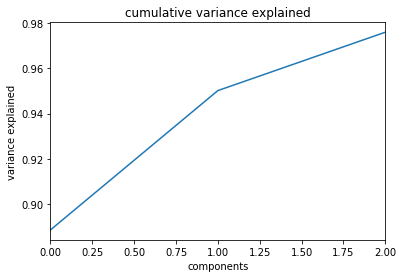

In [15]:
_ = ( pd.Series(pca.explained_variance_ratio_)
.cumsum()
 .plot()
 .set(xlabel='components'
      ,ylabel='variance explained'
     ,title='cumulative variance explained')
)

In [16]:
from sklearn.ensemble import ExtraTreesClassifier 

In [17]:
model = ExtraTreesClassifier()
fit = model.fit(X,y)
print("Feature Importance \n",model.feature_importances_)
# higher the feature importance number
# higher the importance

Feature Importance 
 [0.10715277 0.23754684 0.09700233 0.07936292 0.07666668 0.14154624
 0.11900232 0.1417199 ]


In [18]:
features_score = pd.Series(model.feature_importances_
                 ,index=X.columns)

In [19]:
features_score.sort_values(ascending=False)
# highest importance features are plas mass and age

plas    0.237547
age     0.141720
mass    0.141546
pedi    0.119002
preg    0.107153
pres    0.097002
skin    0.079363
test    0.076667
dtype: float64